<a href="https://colab.research.google.com/github/aradgast/DeepLearningCourse/blob/main/Assignment1_aradVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [1]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [2]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/DataBase/YearPredictionMSD.txt'#.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [3]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [4]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [5]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [6]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here -> our explanation:
# Parts of the var are reffering to the artist's data, for instance : the artist's id, artist's  location, and others...
# those featchures might be studied by the neural network and can help it understand the correct outcome
# in those cases, of course that the neural network will succeed in recognition of the test set
# but it's only imply that the neural networks working good at data that is similar to the training set and
# the result of the test will be faulty.


### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [7]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [8]:
# Write your explanation here

# when we calculate expected value by mean, we want to use as many samples as we can, the more samples by 'large numbers law' the better the estimation is.   
# the same for the estimation of variance.
# because the test set is with the same nature if the train set, we assume that the variance and expactancy are the same.
# for this reason we will use the mean and std we computted with the train set, also for the test set.


### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [9]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here ->
# we should use the validation set to avoid overfitting - not letting the model
# to 'memorized' our data set and by so preventing a flase low loss cause
# by overfitting.
# 
#
#


## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  e = 0.0001
  return -t * np.log(y+e) - (1 - t) * np.log(1 - y + e)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [11]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  return sigmoid(np.dot(X,np.transpose(w)) + b)


In [12]:
pred(np.zeros(90), 1, np.ones([2, 90]))

array([0.73105858, 0.73105858])

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [13]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
        
  """
  
  err = y-t
  dLdb = np.mean(err)
  dLdw = np.dot(np.transpose(X),err)/len(err)
  return dLdb , dLdw





# **Explenation on Gradients**




The cost function is: 

$$L = \frac{1}{N}∑_{(i=1)}^{N} -t_{i}log{y_{i}}-(1-t_{i})log{{(1-y_{i})}}$$

by using partial dertitve we can get,

$$ \frac{∂L}{∂b} =  \frac{∂L}{∂y}\frac{∂y}{∂z}\frac{∂z}{∂b}\quad,y=σ(z), z = w^Tx+b     $$
where each part can be evaluted elmentwise,

$$ \frac{∂L}{∂y_{i}} =  \frac{-t_i}{y_i} + \frac{1-t_i}{1-y_i} $$
$$ \frac{∂y}{∂z} =  σ(z)(1-σ(z)) = y(1-y) $$
$$ \frac{∂z}{∂b} =  1 $$

in total we get,
$$ \frac{∂L}{∂b} =  \frac{1}{N}∑-t_i(1-y_i)+y_i(1-t_i) =\frac{1}{N}∑y_i-t_i   $$
if we sign, error = y - t, will get,
$$ \frac{∂L}{∂b} = mean(error) $$

in the same way we could evalute the derivative in respect to w,

$$ \frac{∂L}{∂w} =  \frac{∂L}{∂y}\frac{∂y}{∂z}\frac{∂z}{∂w}\quad
,y=σ(z), z = w^Tx+b     $$
$$ \frac{∂L}{∂y_{i}} =  \frac{-t_i}{y_i} + \frac{1-t_i}{1-y_i} $$
$$ \frac{∂y}{∂z} =  σ(z_i)(1-σ(z_i)) $$
$$ \frac{∂z}{∂w_i} =  x_i $$

in total we get,
$$ \frac{∂L}{∂w} = \frac{1}{N}error^T * X $$

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [14]:
# Your code goes here
h = 0.000001
w = np.zeros(90)
b = 1
x = np.ones([2, 90])
t = np.ones([2,])
y = pred(w,b,x)
y_h = pred(w, b+h, x)
derivative = derivative_cost(x, y, t)



r1 = (cost(y_h,t)-cost(y,t))/h
r2 = derivative[0]


print("The analytical results is -", r1)
print("The algorithm results is - ", r2)



The analytical results is - -0.268904540134951
The algorithm results is -  -0.2689414213699951


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [15]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code


r1 = np.zeros([90,])
for i in range(len(w)):
  h_vec = np.zeros(w.shape)
  h_vec[i] = h
  y_h = pred(w+h_vec,b,x)
  r1[i] = ((cost(y_h,t)-cost(y,t))/h)


r2 = derivative[1]
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)

The analytical results is - [-0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454 -0.26890454
 -0.26890454 -0.2689045

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [32]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float



  """
  # declare as a global vars
  global train_norm_xs
  global train_ts
  global val_norm_xs
  global val_ts

  train_x = train_norm_xs
  train_label = train_ts
  valid_x = val_norm_xs
  valid_label = val_ts
  w = w0
  b = b0
  iter = 0
  vec_cost = []

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_x))
    train_x = train_x[reindex]
    train_label = train_label[reindex]

    

    for i in range(0, len(train_x), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_x[i:(i + batch_size)]
      t = train_label[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)

      # update w and b
      dLdb , dLdw = derivative_cost(X, y,t)
      b = b0 - mu*dLdb
      w = w0 - mu*dLdw
    # increment the iteration count
    iter += 1
    # compute and print the *validation* loss and accuracy
    if (iter % 10 == 0):
      reindex_val = np.random.permutation(len(valid_x))
      valid_x = valid_x[reindex_val]
      valid_label = valid_label[reindex_val]
      valid_x = valid_x[:15000]
      valid_label = valid_label[:15000]
      val_y = pred(w, b, valid_x)
      val_cost = cost(val_y, valid_label)
      vec_cost.append(val_cost)
      val_acc = get_accuracy(val_y,valid_label)
      # print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
              # iter, val_acc * 100, val_cost))

    if iter >= max_iters:
      break

      # Think what parameters you should return for further use
      #need to be added for plotting
      
  return b,w, vec_cost, val_acc



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [36]:
w0 = np.zeros([90,])
b0 = 0

# Write your code here
b,w,cost_result_001, val_acc_001 = run_gradient_descent(w0, b0, mu=0.01, batch_size=150)
print(f'validation accuracy for mu = 0.01 -> {val_acc_001}')
b,w,cost_result_01, val_acc_01 = run_gradient_descent(w0, b0) #mu = 0.1
print(f'validation accuracy for mu = 0.1 -> {val_acc_01}')
b,w,cost_result_02, val_acc_02 = run_gradient_descent(w0, b0, mu=0.2) 
print(f'validation accuracy for mu = 0.2 -> {val_acc_02}')
b,w,cost_result_05, val_acc_05 = run_gradient_descent(w0, b0, mu=0.5) 
print(f'validation accuracy for mu = 0.5 -> {val_acc_05}')
b,w,cost_result_1, val_acc_1 = run_gradient_descent(w0, b0, mu = 1)
print(f'validation accuracy for mu = 1 -> {val_acc_1}')

validation accuracy for mu = 0.01 -> 0.6002
validation accuracy for mu = 0.1 -> 0.6074
validation accuracy for mu = 0.2 -> 0.5488
validation accuracy for mu = 0.5 -> 0.5087333333333334
validation accuracy for mu = 1 -> 0.5070666666666667


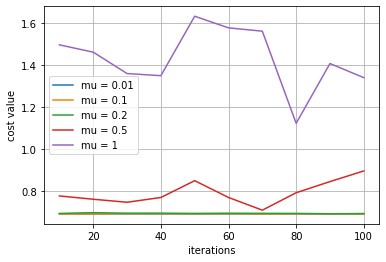

In [37]:
import matplotlib.pyplot as plt

plt.figure()
iter_vec = [(i+1)*10 for i in range(len(cost_result_001))]
plt.plot(iter_vec, cost_result_001, label='mu = 0.01')
plt.plot(iter_vec,cost_result_01, label='mu = 0.1')
plt.plot(iter_vec,cost_result_02, label='mu = 0.2')
plt.plot(iter_vec,cost_result_05, label='mu = 0.5')
plt.plot(iter_vec, cost_result_1, label='mu = 1')
plt.xlabel('iterations')
plt.ylabel('cost value')
plt.legend()
plt.grid()
plt.show()

**Explain and discuss your results here:**


### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

mu=0.05, batch_size=100, we get accurecy of 0.5162666666666667
mu=0.05, batch_size=150, we get accurecy of 0.5174
mu=0.05, batch_size=200, we get accurecy of 0.5166
mu=0.05, batch_size=250, we get accurecy of 0.5132
mu=0.05, batch_size=300, we get accurecy of 0.5162
mu=0.060000000000000005, batch_size=100, we get accurecy of 0.5116
mu=0.060000000000000005, batch_size=150, we get accurecy of 0.5113333333333333
mu=0.060000000000000005, batch_size=200, we get accurecy of 0.5184
mu=0.060000000000000005, batch_size=250, we get accurecy of 0.5127333333333334
mu=0.060000000000000005, batch_size=300, we get accurecy of 0.5148
mu=0.07, batch_size=100, we get accurecy of 0.5176666666666667
mu=0.07, batch_size=150, we get accurecy of 0.5150666666666667
mu=0.07, batch_size=200, we get accurecy of 0.5117333333333334
mu=0.07, batch_size=250, we get accurecy of 0.5055333333333333
mu=0.07, batch_size=300, we get accurecy of 0.5167333333333334
mu=0.08, batch_size=100, we get accurecy of 0.5103333333333

AttributeError: ignored

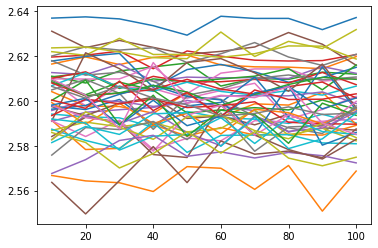

In [41]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
# we wiil iterate on some mu and batch size values.
# we will run the simulation on a fixed value for 'max_iterations' = 150
max_iter = 150
wb_dict = {}

plt.figure()
for mu in range(10):
  for batch_size in [100, 150, 200, 250, 300]:
    w,b,cost_vec, acc = run_gradient_descent(w0, b0, mu=0.05+mu/100, batch_size=batch_size)
    print(f'mu={0.05+mu/100}, batch_size={batch_size}, we get accurecy of {acc}')
    wb_dict[f'{cost_vec[-1]}'] = f'mu={0.05+mu/100}, batch_size={batch_size}', b, w 
    plt.plot([i*10 for i in range(1,len(cost_vec)+1)], cost_vec, label=f'mu={0.05+mu/100}, batch size = {batch_size}')
plt.title('Iterate over mu and batch size to find the best initial values')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()
plt.grid()
plt.show()

print(sorted(wb_dict)[0])

**Explain and discuss your results here:**




### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [51]:
# Write your code here
w,b = sorted(wb_dict)[0][1], sorted(wb_dict)[0][2]
train_acc = get_accuracy(pred(w,b,train_xs), train_ts)
val_acc = get_accuracy(pred(w,b, val_xs ), val_ts)
test_acc = get_accuracy(pred(w,b, test_xs ), test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


UFuncTypeError: ignored

**Explain and discuss your results here:**


### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [21]:
import sklearn.linear_model as lm

model = lm.LogisticRegression
model.fit(train_norm_xs, train_ts)

pred_train = model.predict(train_xs)
pred_val = model.predict(val_xs)
pred_test = model.predict(test_xs)

train_acc = get_accuracy(pred_train, train_ts)
val_acc = get_accuracy(pred_val, val_ts)
test_acc = get_accuracy(pred_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  Ellipsis  val_acc =  Ellipsis  test_acc =  Ellipsis


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
